# Material Informatics(MTN-316)
## Tutorial - 2(G-4)
### Name : Subhadip Mandal , Harsh Raj Bharti , Sorra Sai Teja
### Enrollment No : 20118091 , 20118034 , 20118089

## Q1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pymatgen.ext.matproj import MPRester

In [2]:
API = 'joqsp2fB8lGkkSOQQDK'
mpr  = MPRester(API)

In [3]:
criteria = {'chemsys':{"$in":['B-O','Al-O','Ga-O','In-O','Tl-O','B-Al-O','B-Ga-O','B-In-O','B-Tl-O','Al-Ga-O','Al-In-O','Al-Tl-O','Ga-In-O','Ga-Tl-O','In-Tl-O']}}
props = ['pretty_formula','structure.lattice','density','formation_energy_per_atom','e_above_hull','band_gap']
entries = mpr.query(criteria=criteria,properties=props)

In [4]:
df = pd.DataFrame(entries)
df['a'] = df['structure.lattice'].apply(lambda x:x['a'])
df['b'] = df['structure.lattice'].apply(lambda x:x['b'])
df['c'] = df['structure.lattice'].apply(lambda x:x['c'])
df['alpha'] = df['structure.lattice'].apply(lambda x:x['alpha'])
df['beta'] = df['structure.lattice'].apply(lambda x:x['beta'])
df['gamma'] = df['structure.lattice'].apply(lambda x:x['gamma'])
df.drop('structure.lattice',inplace=True,axis=1)

In [5]:
df.head()

,pretty_formula,density,formation_energy_per_atom,e_above_hull,band_gap,a,b,c,alpha,beta,gamma
0,AlGaO3,4.815930,-2.829282,0.027667,3.2132,5.001676,8.601477,9.277844,90.0,90.0,90.000000
1,AlGaO3,4.871107,-2.828189,0.028760,3.1117,4.995092,8.625028,9.159761,90.0,90.0,90.000000
2,AlGaO3,5.268751,-2.749419,0.107530,2.6071,4.889231,5.009529,7.448018,90.0,90.0,90.000000
3,Al11InO17,3.553205,-3.302315,0.013353,3.7251,5.656147,5.656147,23.061733,90.0,90.0,120.000009
4,AlInO3,6.148600,-2.253180,0.467778,0.0000,3.714679,3.714679,3.714679,90.0,90.0,90.000000


## Q2

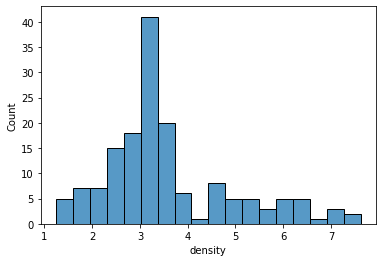

In [6]:
sns.histplot(df['density'])

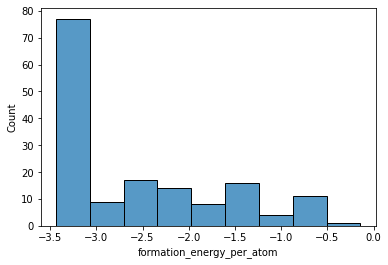

In [7]:
sns.histplot(df['formation_energy_per_atom'])

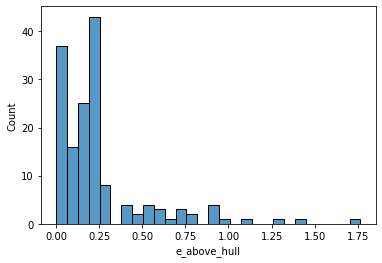

In [8]:
sns.histplot(df['e_above_hull'])

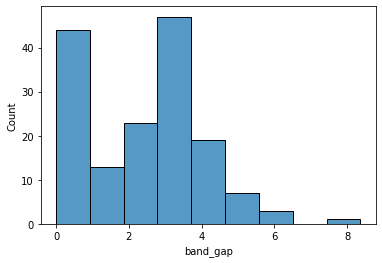

In [9]:
sns.histplot(df['band_gap'])

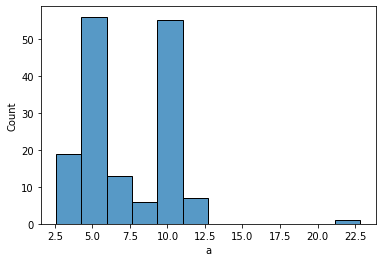

In [10]:
sns.histplot(df['a'])

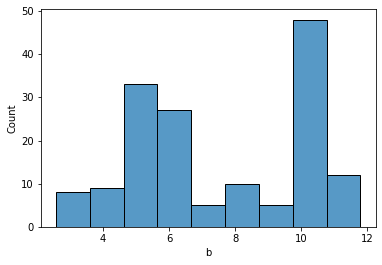

In [11]:
sns.histplot(df['b'])

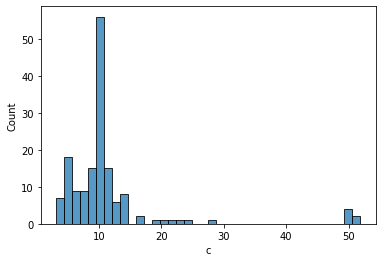

In [12]:
sns.histplot(df['c'])

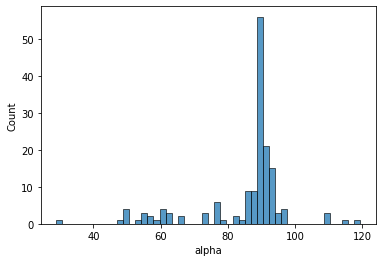

In [13]:
sns.histplot(df['alpha'])

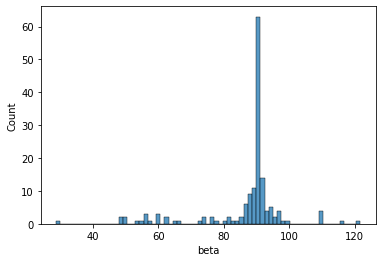

In [14]:
sns.histplot(df['beta'])

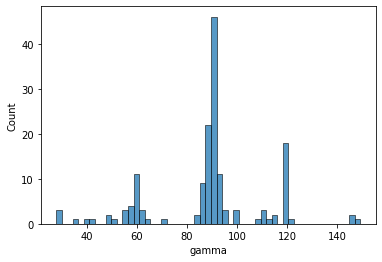

In [15]:
sns.histplot(df['gamma'])

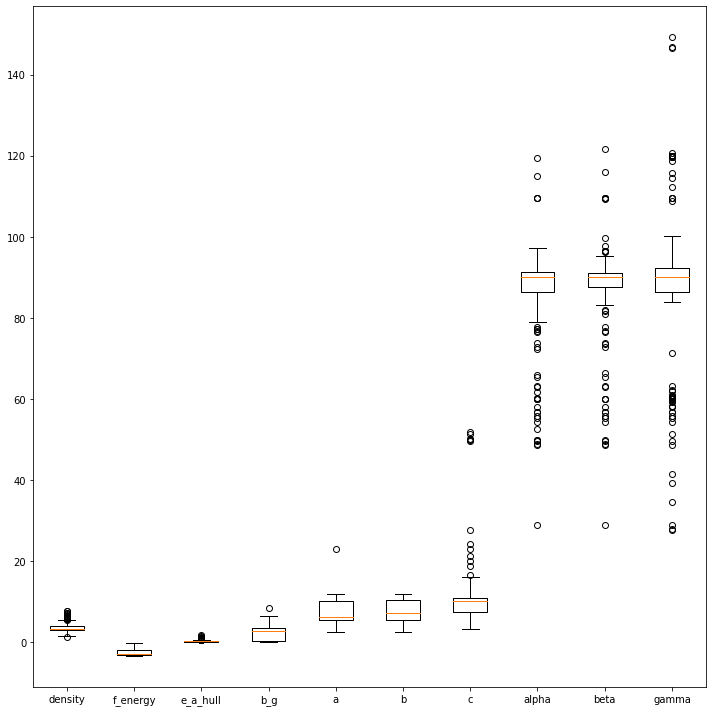

In [16]:
data =[df['density'],df['formation_energy_per_atom'],df['e_above_hull'],df['band_gap'],df['a'],df['b'],df['c'],df['alpha'],df['beta'],df['gamma']]
figure=plt.figure(figsize=(10,10))
plt.boxplot(data,labels=['density','f_energy','e_a_hull','b_g','a','b','c','alpha','beta','gamma'])
plt.tight_layout()

## Q3

From the given data we see that 
For density:  Most of the compounds have a value between 2 to 4 , for the values from 1 to 2 and 4 to 7 , each value has 5 or lesser elements
For formation energy per atom:  Majority of the compounds posses a value between -3 and -3.5 , while for values from -3 to -0.5 the distribution is fairly even with two dips.The value range is from -3.5 to -0.5.
For energy above the hull:  Major compunds are between the values 0 and 0.25, with a small distribution till 1 . The value range is small.
For band gap:  Major lie at 0 and 3 with some distribution between 1 to 5.
For a:  Major values for compounds are 5 and 10 with small distribution in the range of 2.5 to 12. and an outlier at 22.5.
For b:  Major distriution for 5-6 and 10 with lesser distribution for lower values.
For c:  Highest density is at 10 with small distribution around it from 5 to 15, with a few outliers near 20 and one at 50.
For alpha:  normal distribution with peak at 90 and outlier in the range of 40 to 80 and around 120
For beta:  Similar distribution to alpha with main distribution around 90 and outliers from 40 to 80  and around 120
For gamma:  Similar to alpha distribution with a wider distribution around 90 and outliers from 20 to 70 and around 120 and 150.

## Q4

In [17]:
df.describe()

,density,formation_energy_per_atom,e_above_hull,band_gap,a,b,c,alpha,beta,gamma
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,3.574813,-2.552349,0.251024,2.342734,7.433867,7.582949,11.366531,85.260673,86.533589,88.321278
std,1.364655,0.872252,0.284961,1.746517,3.030253,2.607474,8.660188,13.701764,12.973137,22.069556
min,1.245752,-3.435728,0.000000,0.000000,2.571560,2.571560,3.165385,28.845002,28.845002,27.706050
25%,2.970010,-3.240910,0.070349,0.295800,5.316091,5.422800,7.448018,86.313722,87.627448,86.346723
50%,3.120025,-2.992422,0.189125,2.755300,6.092113,7.114438,10.210319,90.000000,90.000000,90.000000
75%,3.965193,-1.964391,0.240903,3.343300,10.238891,10.264941,10.973812,91.247553,91.095274,92.365754
max,7.617550,-0.143771,1.764967,8.366900,22.860096,11.798155,51.890590,119.514147,121.698862,149.200515


We can see that the count for every feature is 157, which means there are no NULL values in our dataframe.

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


a                             1
alpha                        36
b                             0
band_gap                      1
beta                         39
c                            13
density                      21
e_above_hull                 22
formation_energy_per_atom     0
gamma                        61
pretty_formula                0
dtype: int64

The above table gives us the number of outliers in the given feature.

## Q5

In machine learning usually, there are four types of feature scaling widely used. They are **min-max**, **standard**, **log** scalings. Scaling is done in order to make all features of data comparable by a single scale. 




**Min-Max Normalization**: This technique re-scales a feature or observation value with distribution value between 0 and 1

**Standardization**: It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.

**Log-Scaling**:Log scaling computes the log of your values to compress a wide range to a narrow range. Log scaling is helpful when a handful of your values have many points, while most other values have few points

The best choice of scaling method depends on the data, we can't say that this scaling technique will work for all data.

In [19]:
df1 =df
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df1.iloc[:,1:].values)

array([[0.56030938, 0.18422065, 0.01567576, ..., 0.67448522, 0.65861557,
        0.51273076],
       [0.56896895, 0.18455252, 0.01629476, ..., 0.67448522, 0.65861557,
        0.51273076],
       [0.63137578, 0.20848064, 0.06092469, ..., 0.67448522, 0.65861557,
        0.51273076],
       ...,
       [0.92980341, 0.44928003, 0.02802837, ..., 0.67448522, 0.65861557,
        0.51273076],
       [0.89392169, 0.44316951, 0.01663124, ..., 0.3074434 , 0.3002097 ,
        0.23881399],
       [1.        , 0.50901798, 0.13944959, ..., 0.67448522, 0.65861557,
        0.51273076]])

In [21]:
df2 =df
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df.iloc[:,1:].values)

array([[ 0.91238344, -0.31850735, -0.78632144, ...,  0.34699857,
         0.26805415,  0.07630846],
       [ 0.95294578, -0.31725082, -0.78247527, ...,  0.34699857,
         0.26805415,  0.07630846],
       [ 1.24526602, -0.22665493, -0.50516583, ...,  0.34699857,
         0.26805415,  0.07630846],
       ...,
       [ 2.64313291,  0.68505196, -0.70956811, ...,  0.34699857,
         0.26805415,  0.07630846],
       [ 2.4750591 ,  0.66191651, -0.78038458, ..., -2.08961202,
        -2.30540689, -1.43644817],
       [ 2.97194125,  0.91122986, -0.01724899, ...,  0.34699857,
         0.26805415,  0.07630846]])